#### **Working with pre-trained models**

**Q) Why not train models from scratch?**
- It is a long process
- It requires a lot of training data
- It requires a lot of computational power (especially if we're building a large model)

**Solution?**
- Use pre-trained models.

**Advantages of pre-trained models?**
- They are already trained for a specific task.
- Pretrained models are directly re-usable on a new task.
- We only require to adjust the model to perform well on the new task.

These pre-trained models can be the ones that we either trained ourselves or \
models that are publically available on the internet.

#### **Saving a trained model in PyTorch**

We can access model's weights using the `model.state_dict()` method. \
We can save these weights using the `torch.save()` method. \
We generally use `.pt` or `.pth` extention to save pytorch models.

In [ ]:
# For Example -
import torch

model = LSTM()
torch.save(model.state_dict(), 'LSTM_10M.pt')

Here, `LSTM_10.pt` will be the filename of the saved file. 

#### **Loading a saved model in PyTorch**

We can load an existing model using `torch.load()` method. \
We can use `model.load_state_dict()` method to assign the loaded weights to a model.

In [ ]:
# For Example -
model_02 = LSTM()

model_02.load_state_dict(torch.load('LSTM_10M.ipynb'))

#### **Example of using a pre-trained model -**

In [2]:
import torch
from torchvision.models import resnet18, ResNet18_Weights 

# extracting weights
weights = ResNet18_Weights.DEFAULT

# loading weights into the model
model = resnet18(weights=weights)

# loading transforms used on the weights into the transforms variable 
# so that we can perform same data transformation in our input data 
# and converting it into the input format that the model expects
transform = weights.transforms()

`ResNet18_Weights.DEFAULT` is equivalent to `ResNet18_Weights.IMAGENET1K_V1`. You can use either.

Check out the [official documentation here](https://pytorch.org/vision/main/models/generated/torchvision.models.resnet18.html#torchvision.models.ResNet18_Weights) for more info.

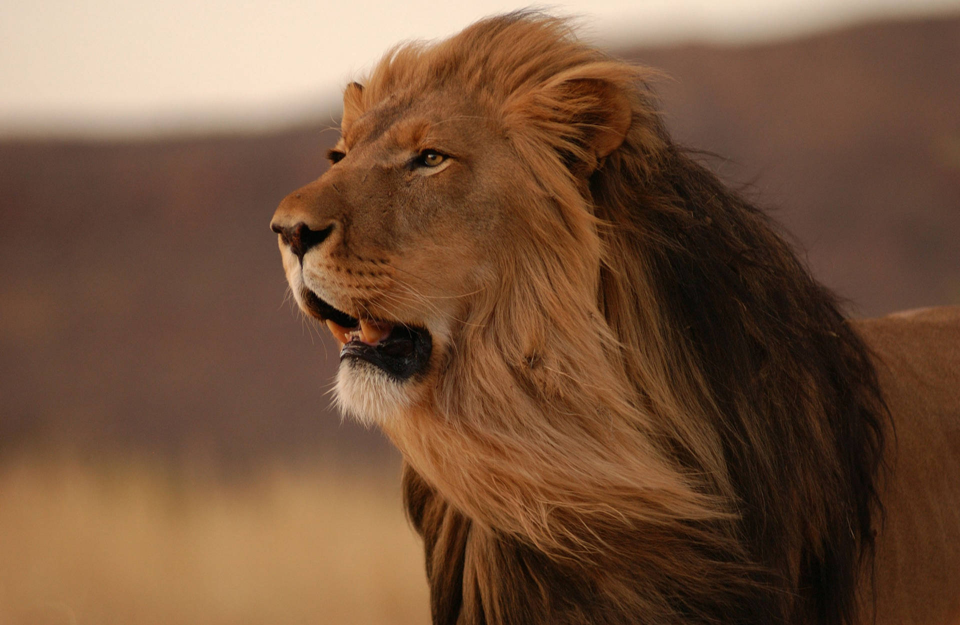

In [38]:
from PIL import Image
from IPython.display import display

# loading the image
# image = Image.open('data/cat.jpg')
image = Image.open('data/lion.jpg')

# display the image
display(image.resize((image.width//2, image.height//2)))

In [39]:
# transforming and unsqueezing the image
image_tensor = transform(image)
image_reshaped = image_tensor.unsqueeze(0)
# or we can do both steps in a single statement img = transform(img).unsqueeze(0)
image_reshaped

tensor([[[[ 2.0948,  2.0777,  2.0948,  ...,  0.5878,  0.5536,  0.5364],
          [ 2.1119,  2.0948,  2.1119,  ...,  0.4166,  0.3823,  0.3652],
          [ 2.0948,  2.1119,  2.1119,  ...,  0.2453,  0.2111,  0.2282],
          ...,
          [ 1.0159,  0.9988,  1.0159,  ..., -1.3130, -1.3815, -1.4158],
          [ 1.0159,  1.0159,  1.0159,  ..., -1.2274, -1.3302, -1.2617],
          [ 0.9988,  0.9988,  0.9988,  ..., -1.4500, -1.4843, -1.3644]],

         [[ 1.9034,  1.9034,  1.9034,  ...,  0.2927,  0.2577,  0.2402],
          [ 1.9034,  1.8859,  1.9034,  ...,  0.1001,  0.0651,  0.0126],
          [ 1.8859,  1.9034,  1.9034,  ..., -0.1275, -0.1625, -0.1975],
          ...,
          [ 0.4153,  0.3978,  0.4153,  ..., -1.5805, -1.5980, -1.6155],
          [ 0.3978,  0.3978,  0.4153,  ..., -1.5280, -1.5805, -1.5105],
          [ 0.3978,  0.3978,  0.3803,  ..., -1.6331, -1.6681, -1.5630]],

         [[ 1.7163,  1.6988,  1.7163,  ...,  0.0953,  0.0779,  0.0605],
          [ 1.7163,  1.6988,  

In [40]:
# generating a new prediction

model.eval()

with torch.no_grad():
    pred = model(image_reshaped).squeeze(0)
    pred_cls = pred.softmax(0)
    cls_id = pred_cls.argmax().item()
    cls_name = weights.meta['categories'][cls_id]

print(f'This subject in the image is {"an" if cls_name[0].lower() in "aeiou" else "a"} \"{cls_name}\"')

This subject in the image is a "lion"
